Here we would do explore data on the survivers of titanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Getting the data and trying to under stand the basic idea

In [2]:
data=pd.read_csv("Titanic.csv")

In [3]:
data.shape  

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


From the basic data we unddderstand that there is 891 passengere and12 features that are defined in the data base there are no dulicates andd there are some null values in ages of the passengers 

Here we woul then remove passengers,ticket and name which does not have any relavence to the sertvival chance of a person

Data Visualization and Storytelling with Tableau

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data['Cabin'].unique

<bound method Series.unique of 0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object>

In [10]:
data.drop(["PassengerId","Ticket","Name"],axis=1,inplace=True)

<Axes: xlabel='Survived', ylabel='count'>

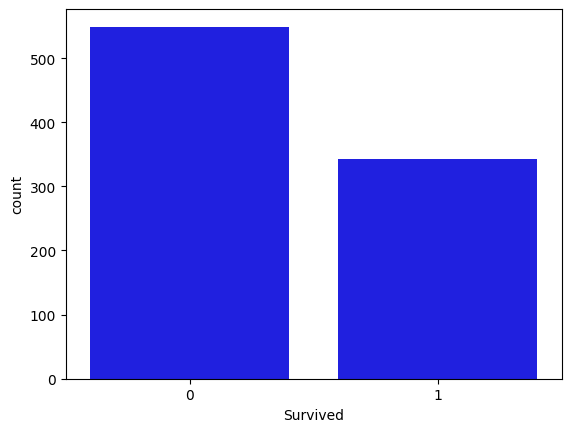

In [11]:
sns.countplot(x='Survived',data=data,color='blue')

In [12]:
data.groupby(['Survived','Sex','Age'])['Survived'].count()

Survived  Sex     Age 
0         female  2.0     4
                  3.0     1
                  6.0     1
                  8.0     1
                  9.0     4
                         ..
1         male    52.0    1
                  56.0    1
                  60.0    1
                  62.0    1
                  80.0    1
Name: Survived, Length: 216, dtype: int64

SO there is a higher percentage of femail survived so the crow prioritized femaile children over man

In [13]:
data = data.dropna(subset=['Age'])


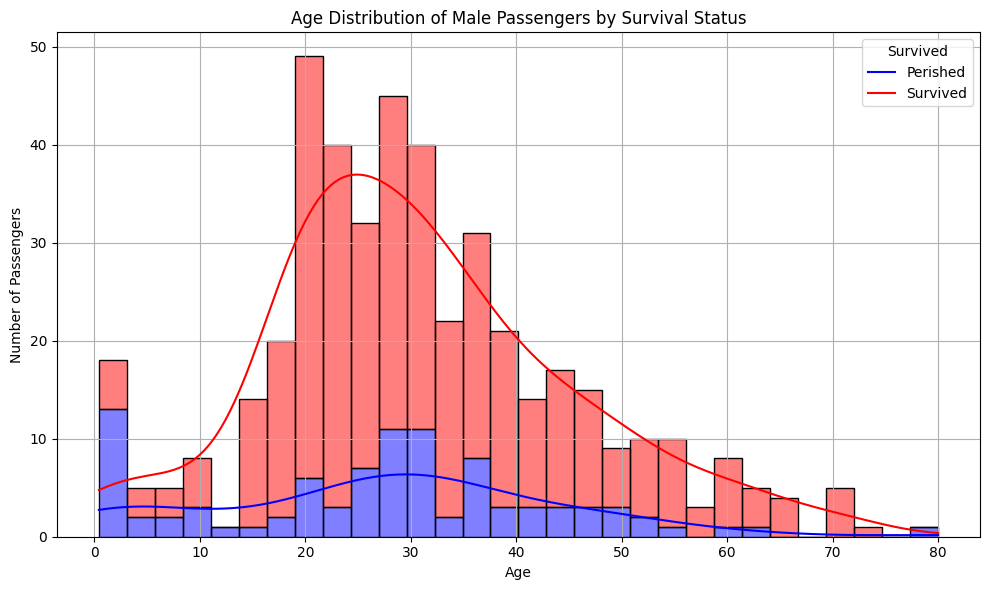

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter male passengers
male_passengers = data[data['Sex'] == 'male']

# Set plot size
plt.figure(figsize=(10, 6))

# Histogram of age, split by survival
sns.histplot(data=male_passengers, x='Age', hue='Survived', bins=30, kde=True, palette={0: 'red', 1: 'blue'}, multiple="stack")

plt.title('Age Distribution of Male Passengers by Survival Status')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['Perished', 'Survived'])
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\athun\AppData\Local\Temp\ipykernel_17912\2581739209.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_passengers['AgeGroup'] = pd.cut(male_passengers['Age'], bins=bins, labels=labels, right=False)
C:\Users\athun\AppData\Local\Temp\ipykernel_17912\2581739209.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = male_passengers.groupby('AgeGroup')['Survived'].mean()


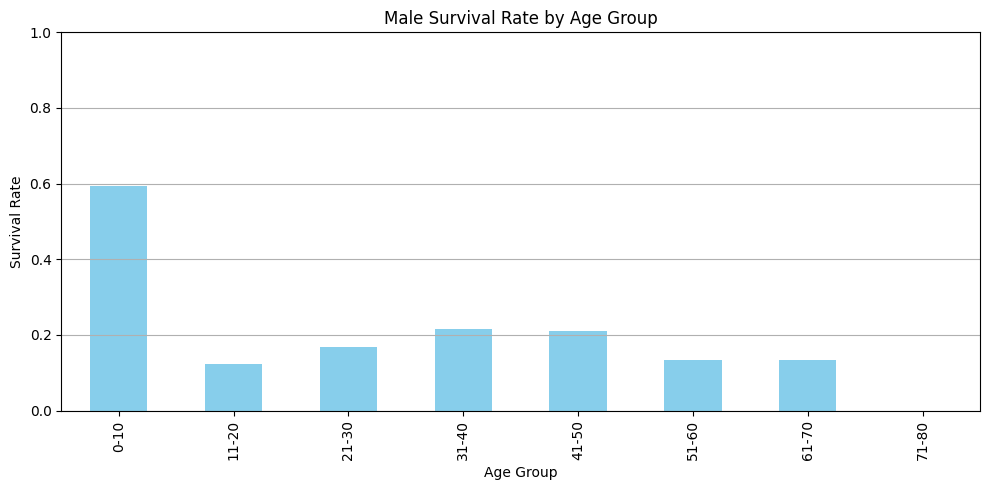

In [15]:
# Define age bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Add age group column to male passengers
male_passengers['AgeGroup'] = pd.cut(male_passengers['Age'], bins=bins, labels=labels, right=False)

# Calculate survival rate by age group
age_group_survival = male_passengers.groupby('AgeGroup')['Survived'].mean()

# Plot
age_group_survival.plot(kind='bar', figsize=(10, 5), color='skyblue')

plt.title('Male Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


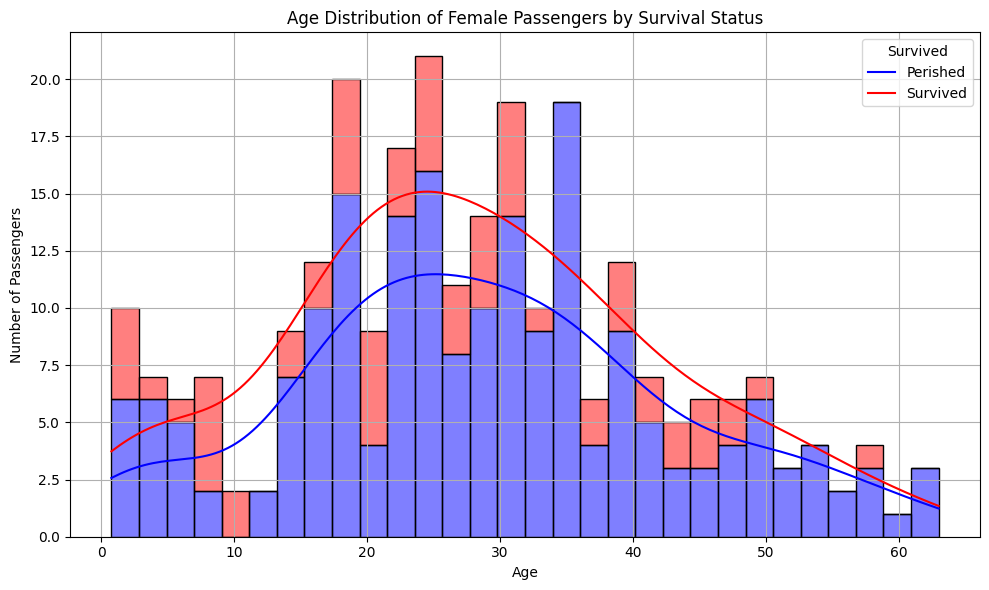

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter male passengers
f_passengers = data[data['Sex'] == 'female']

# Set plot size
plt.figure(figsize=(10, 6))

# Histogram of age, split by survival
sns.histplot(data=f_passengers, x='Age', hue='Survived', bins=30, kde=True, palette={0: 'red', 1: 'blue'}, multiple="stack")

plt.title('Age Distribution of Female Passengers by Survival Status')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['Perished', 'Survived'])
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\athun\AppData\Local\Temp\ipykernel_17912\1206354728.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_passengers['AgeGroup'] = pd.cut(f_passengers['Age'], bins=bins, labels=labels, right=False)
C:\Users\athun\AppData\Local\Temp\ipykernel_17912\1206354728.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = f_passengers.groupby('AgeGroup')['Survived'].mean()


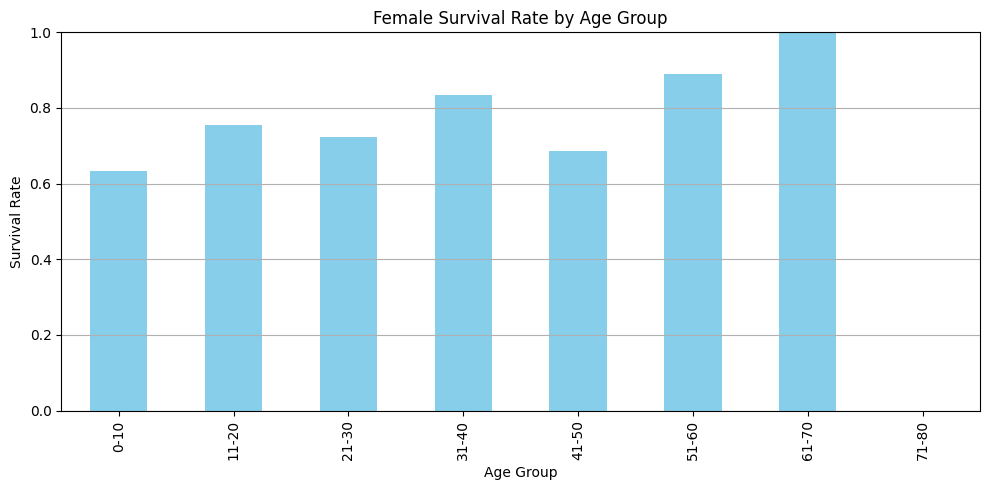

In [17]:
# Define age bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Add age group column to male passengers
f_passengers['AgeGroup'] = pd.cut(f_passengers['Age'], bins=bins, labels=labels, right=False)

# Calculate survival rate by age group
age_group_survival = f_passengers.groupby('AgeGroup')['Survived'].mean()

# Plot
age_group_survival.plot(kind='bar', figsize=(10, 5), color='skyblue')

plt.title('Female Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

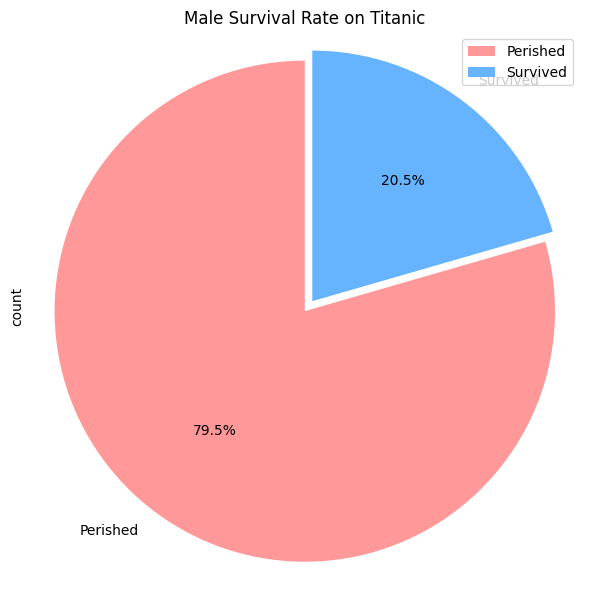

In [18]:
# Pie chart for survival distribution among male passengers
data[data['Sex'] == 'male']['Survived'] \
    .value_counts() \
    .sort_index() \
    .plot(
        kind='pie',
        figsize=(6, 6),
        explode=[0, 0.05],  # Slightly explode the second slice (Survived)
        autopct='%1.1f%%',  # Show percentages with 1 decimal place
        labels=["Perished", "Survived"],  # Custom labels (0 = Perished, 1 = Survived)
        colors=['#ff9999','#66b3ff'],
        startangle=90
    )

plt.axis('equal')  # Ensures the pie chart is circular
plt.title("Male Survival Rate on Titanic")
plt.legend(["Perished", "Survived"], loc="upper right")
plt.tight_layout()
plt.show()

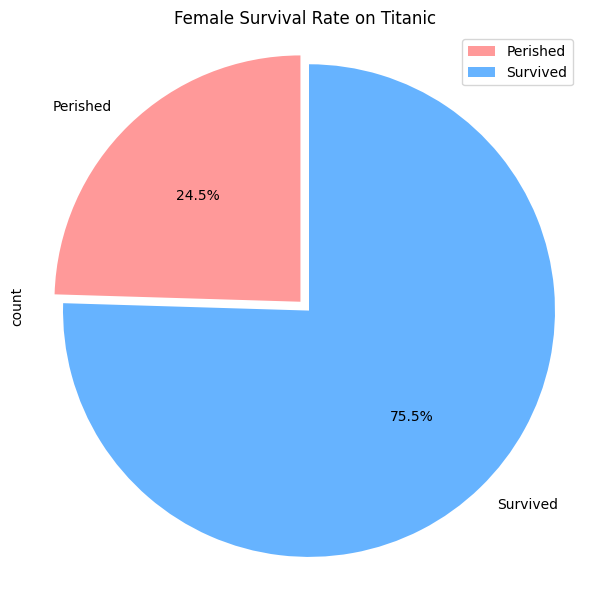

In [19]:
# Pie chart for survival distribution among male passengers
data[data['Sex'] == 'female']['Survived'] \
    .value_counts() \
    .sort_index() \
    .plot(
        kind='pie',
        figsize=(6, 6),
        explode=[0, 0.05],  # Slightly explode the second slice (Survived)
        autopct='%1.1f%%',  # Show percentages with 1 decimal place
        labels=["Perished", "Survived"],  # Custom labels (0 = Perished, 1 = Survived)
        colors=['#ff9999','#66b3ff'],
        startangle=90
    )

plt.axis('equal')  # Ensures the pie chart is circular
plt.title("Female Survival Rate on Titanic")
plt.legend(["Perished", "Survived"], loc="upper right")
plt.tight_layout()
plt.show()

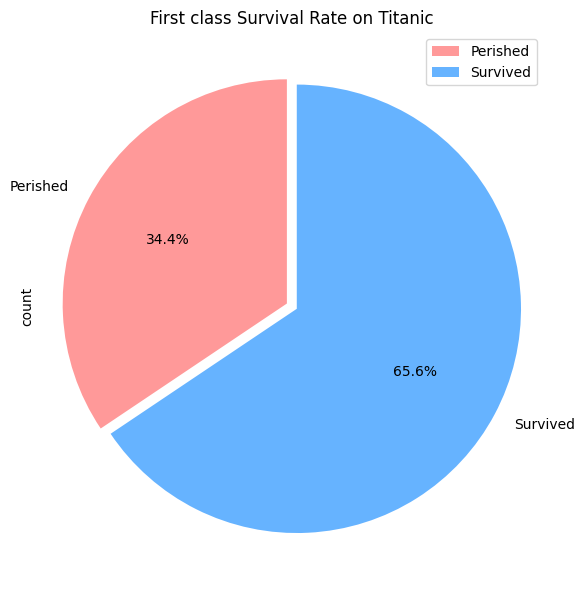

In [20]:
data[data['Pclass'] == 1]['Survived'] \
    .value_counts() \
    .sort_index() \
    .plot(
        kind='pie',
        figsize=(6, 6),
        explode=[0, 0.05],  # Slightly explode the second slice (Survived)
        autopct='%1.1f%%',  # Show percentages with 1 decimal place
        labels=["Perished", "Survived"],  # Custom labels (0 = Perished, 1 = Survived)
        colors=['#ff9999','#66b3ff'],
        startangle=90
    )

plt.axis('equal')  # Ensures the pie chart is circular
plt.title("First class Survival Rate on Titanic")
plt.legend(["Perished", "Survived"], loc="upper right")
plt.tight_layout()
plt.show()

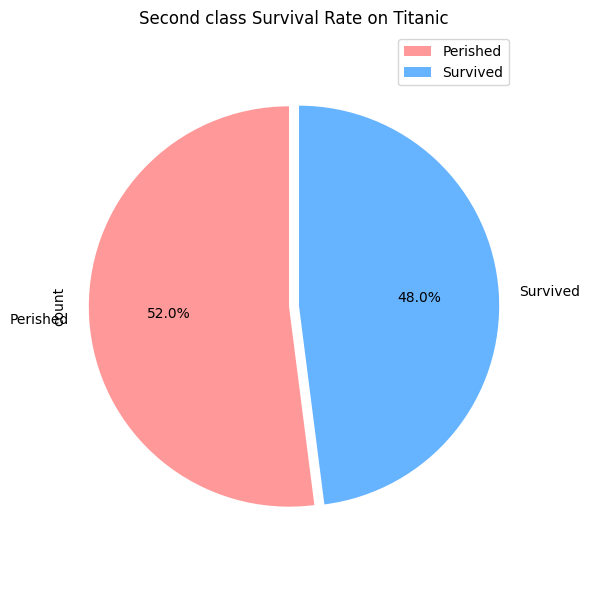

In [21]:
data[data['Pclass'] == 2]['Survived'] \
    .value_counts() \
    .sort_index() \
    .plot(
        kind='pie',
        figsize=(6, 6),
        explode=[0, 0.05],  # Slightly explode the second slice (Survived)
        autopct='%1.1f%%',  # Show percentages with 1 decimal place
        labels=["Perished", "Survived"],  # Custom labels (0 = Perished, 1 = Survived)
        colors=['#ff9999','#66b3ff'],
        startangle=90
    )

plt.axis('equal')  # Ensures the pie chart is circular
plt.title("Second class Survival Rate on Titanic")
plt.legend(["Perished", "Survived"], loc="upper right")
plt.tight_layout()
plt.show()

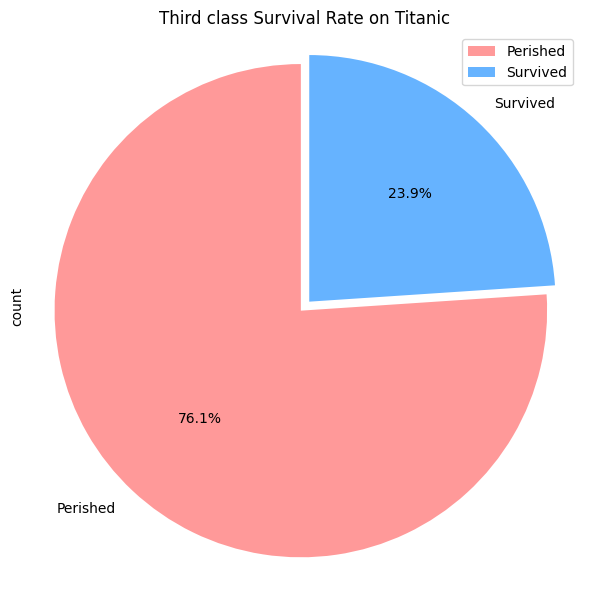

In [22]:
data[data['Pclass'] == 3]['Survived'] \
    .value_counts() \
    .sort_index() \
    .plot(
        kind='pie',
        figsize=(6, 6),
        explode=[0, 0.05],  # Slightly explode the second slice (Survived)
        autopct='%1.1f%%',  # Show percentages with 1 decimal place
        labels=["Perished", "Survived"],  # Custom labels (0 = Perished, 1 = Survived)
        colors=['#ff9999','#66b3ff'],
        startangle=90
    )

plt.axis('equal')  # Ensures the pie chart is circular
plt.title("Third class Survival Rate on Titanic")
plt.legend(["Perished", "Survived"], loc="upper right")
plt.tight_layout()
plt.show()

<Axes: xlabel='Pclass', ylabel='Survived'>

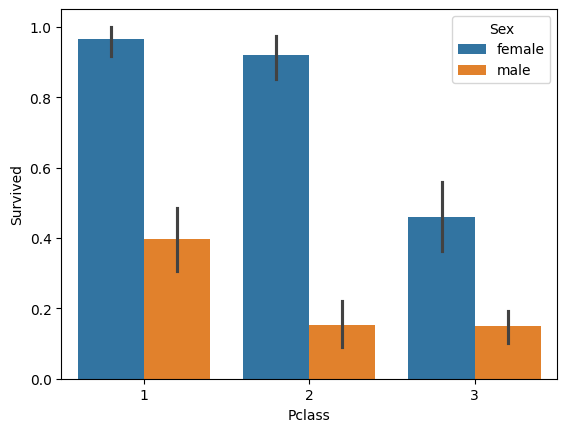

In [23]:
sns.barplot(x='Pclass',y='Survived',hue='Sex', data=data)



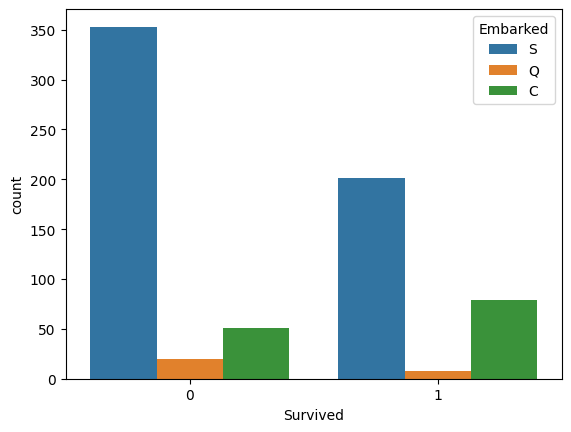

In [24]:
sns.countplot(x='Survived', data=data,hue = 'Embarked');



In [25]:


pd.crosstab([data.Sex, data.Survived], [data.SibSp, data.Pclass], margins=True)



SibSp              0             1          2         3         4  5  All
Pclass             1    2    3   1   2   3  1  2   3  1  2  3   3  3     
Sex    Survived                                                          
female 0           1    3   25   2   3  18  0  0   3  0  0  4   4  1   64
       1          45   39   31  32  25  10  3  3   3  2  1  1   2  0  197
male   0          43   60  164  16  20  27  1  4   6  1  0  3  11  4  360
       1          24    7   29  15   7   8  1  1   0  0  0  0   1  0   93
All              113  109  249  65  55  63  5  8  12  3  1  8  18  5  714



The above crosstab indicates 2 things:

    Most of the passerenges didn'y had siblings onboard and the majority had atmost 1 sibling onboard

    Not much of priority was given to the passengers who had sibelings onboard in the rescue operation



In [26]:


pd.crosstab([data.Sex, data.Survived], [data.Parch, data.Pclass], margins=True)



Parch              0             1           2          3     4     5  6  All
Pclass             1    2    3   1   2   3   1   2   3  2  3  1  3  3  3     
Sex    Survived                                                              
female 0           1    5   27   0   1  10   2   0  11  0  1  0  2  3  1   64
       1          55   38   27  16  17  11  11  11   7  2  1  0  0  1  0  197
male   0          47   74  181  10   7  21   3   3  10  0  1  1  1  1  0  360
       1          31    6   29   4   7   6   5   2   3  0  0  0  0  0  0   93
All              134  123  264  30  32  48  21  16  31  2  3  1  3  5  1  714



The above crosstab indicates 2 things:

    Most of the passerenges didn't had parents onboard and the majority had atmost 1 parent onboard
    Not much of priority was given to the passengers who had parents onboard in the rescue operation



In [27]:
data.corr(numeric_only=True)



,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189
Pclass,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329
Parch,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119
Fare,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000


<Axes: >

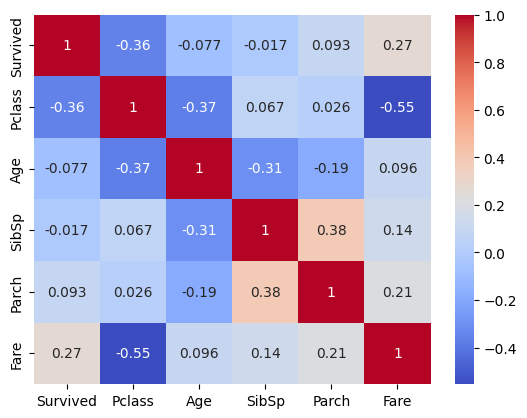

In [28]:
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='coolwarm')

📊 Key Insights from Your Heatmap
Feature Pair	Correlation	Interpretation
Survived & Pclass	-0.36	Higher-class passengers (Pclass=1) were more likely to survive.
Survived & Fare	+0.27	Those who paid higher fares had a better chance of survival.
Survived & Age	-0.077	Weak negative correlation — older passengers were slightly less likely to survive.
Survived & SibSp	-0.017	No strong correlation with number of siblings/spouses aboard.
Survived & Parch	+0.093	Very weak positive correlation — may suggest traveling with family helped a bit.

<Axes: xlabel='Pclass', ylabel='Fare'>

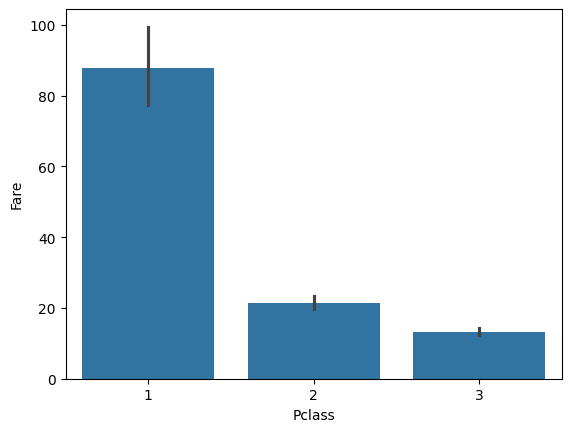

In [29]:


sns.barplot(y = "Fare",x = "Pclass",data = data)



c:\Users\athun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 52.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\athun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\athun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 64.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\athun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 35.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

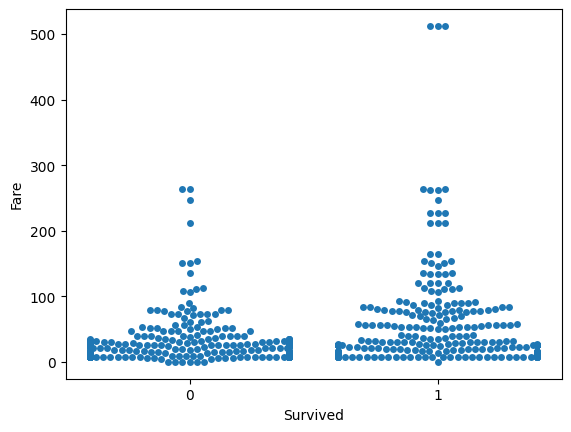

In [30]:


sns.swarmplot(x='Survived', y='Fare', data=data);



<Axes: xlabel='Survived', ylabel='Fare'>

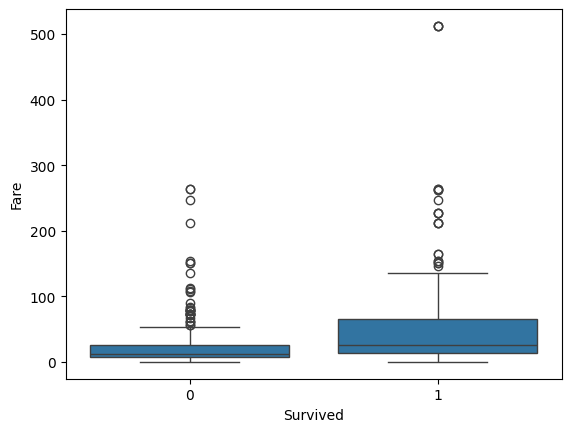

In [31]:
sns.boxplot(x='Survived', y='Fare', data=data)


<Axes: xlabel='Pclass', ylabel='Fare'>

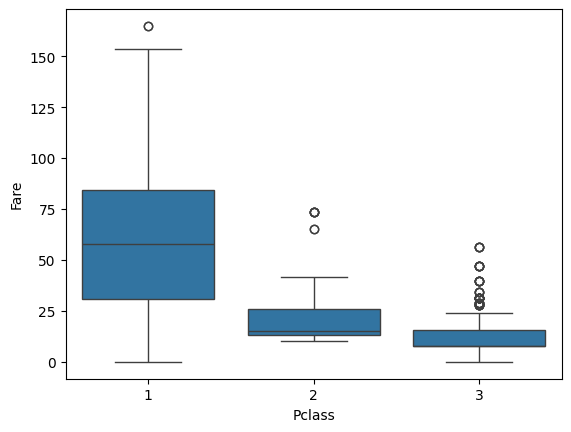

In [32]:


sns.boxplot(y = "Fare",x = "Pclass",data = data[data["Fare"] < 200])



<Axes: xlabel='Pclass', ylabel='Fare'>

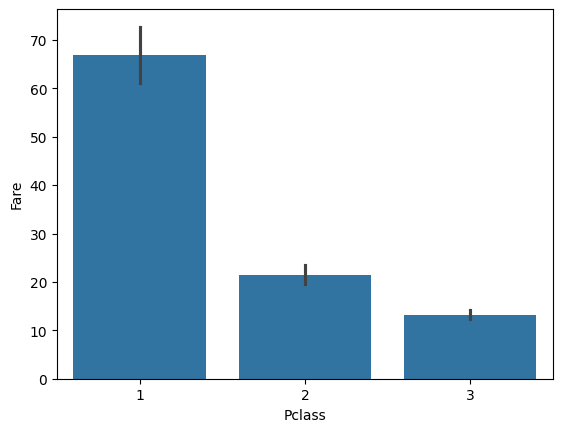

In [33]:
sns.barplot(y = "Fare",x = "Pclass",data = data[data["Fare"] < 200])

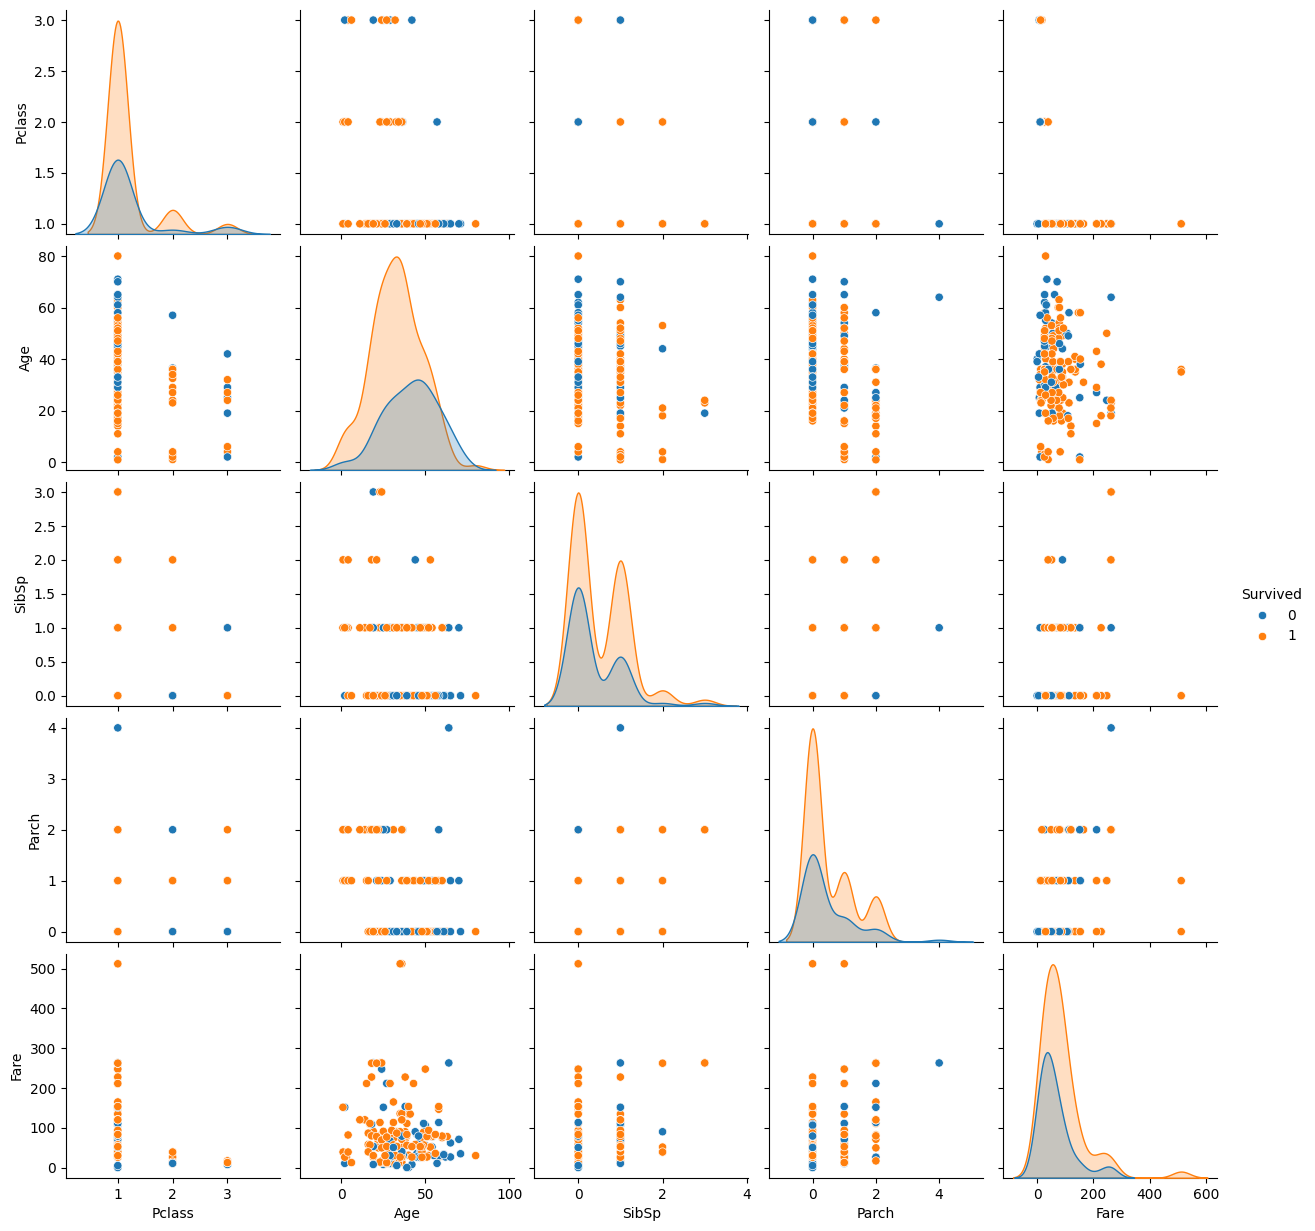

In [34]:
sns.pairplot(data.dropna(),hue = "Survived")

In [35]:
data.groupby('Survived').describe()['Age']

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0




Both values actually look very similar

Now let's try something special. If we see the name column, there is data which corresponds to the age of the person. Yes: Mr. Mrs. Master. Miss. So lets use that in filling the NA values for age.


In [36]:


def extract(x):
    temp = x.split(" ")
    if "Mr." in temp:
        return "Mr"
    elif "Mrs." in temp:
        return "Mrs"
    elif "Miss." in temp:
        return "Miss"
    elif "Master." in temp:
        return "Master"
    elif "Dr." in temp:
        return "Dr"
    else:
        return None



In [37]:
data=pd.read_csv("Titanic.csv")
data["Category"] = data["Name"].apply(extract)



In [38]:


print("Mr." , np.mean(data[data["Category"] == "Mr"]["Age"]))
print("Mrs." , np.mean(data[data["Category"] == "Mrs"]["Age"]))
print("Miss." , np.mean(data[data["Category"] == "Miss"]["Age"]))
print("Master." , np.mean(data[data["Category"] == "Master"]["Age"]))
print("Dr." , np.mean(data[data["Category"] == "Dr"]["Age"]))



Mr. 32.368090452261306
Mrs. 35.898148148148145
Miss. 21.773972602739725
Master. 4.574166666666667
Dr. 42.0


This should be a better approach to fill the missing values of Age column

Creating new moddel

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import joblib

 Step 2: Load and Preprocess the Data

In [40]:
# Load dataset
data = pd.read_csv("Titanic.csv")

# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

# Extract Title from Name
def extract_title(name):
    return name.split(',')[1].split('.')[0].strip()

data['Title'] = data['Name'].apply(extract_title)

# Simplify titles
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 
        'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

# Create FamilySize and IsAlone
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1

# Encode categorical variables
label = LabelEncoder()
data['Sex'] = label.fit_transform(data['Sex'])  # male=1, female=0
data['Embarked'] = label.fit_transform(data['Embarked'])
data['Title'] = label.fit_transform(data['Title'])

# Drop unnecessary columns
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


C:\Users\athun\AppData\Local\Temp\ipykernel_17912\11838032.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\athun\AppData\Local\Temp\ipykernel_17912\11838032.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

🧪 Step 3: Prepare Data for Modeling

In [41]:
X = data.drop('Survived', axis=1)
y = data['Survived']

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    cv = cross_val_score(model, X, y, cv=5).mean()
    cm = confusion_matrix(y_test, y_pred)

    print(f"=== {name} ===")
    print(f"Accuracy: {acc:.2f}")
    print(f"Cross-Validation Score: {cv:.2f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")
    filename = f"{name.replace(' ', '_').lower()}_model.pkl"
    joblib.dump(model, filename)
    print(f"✅ {name} saved as {filename}")


=== Logistic Regression ===
Accuracy: 0.80
Cross-Validation Score: 0.79
Confusion Matrix:
[[90 15]
 [20 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



✅ Logistic Regression saved as logistic_regression_model.pkl
=== Decision Tree ===
Accuracy: 0.78
Cross-Validation Score: 0.79
Confusion Matrix:
[[82 23]
 [17 57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       105
           1       0.71      0.77      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179



✅ Decision Tree saved a

C:\Users\athun\AppData\Local\Temp\ipykernel_17912\383709842.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")


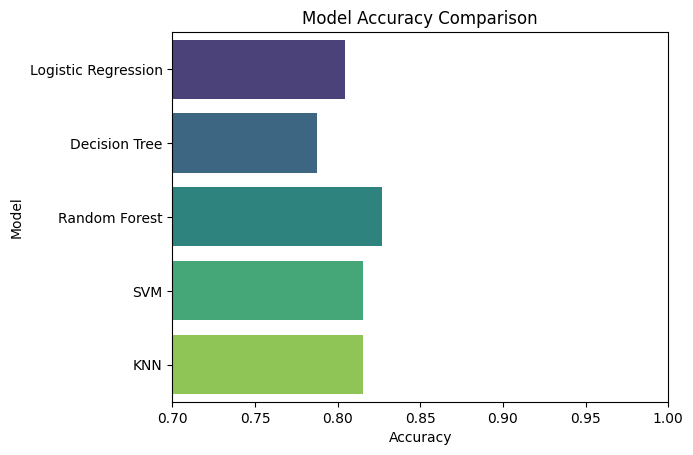

In [43]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    cv = cross_val_score(model, X, y, cv=5).mean()
    results.append((name, acc, cv))

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "CV Score"])
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xlim(0.7, 1)
plt.show()
